In [ ]:
###
#Title: Stock_Model_TreeAndLinearRegression
#Author: Guo Zebin

#Description: This is stock prediction model using ML models
#             Use tree regressor and linear regressor
#Evaluation: Using MSE
#Conclusion: Decision Tree Regressor performs better than linear regressor
#Discussion: 1. Why tree is better? 2. Only one feature used 3. (from 2) do not 
#             implement feature scaling technique, etc.

In [ ]:
#Import all the library used
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import random
plt.style.use('bmh')

In [ ]:
#load the data from local environment
from google.colab import files
uploaded = files.upload()

Saving netflix.csv to netflix (1).csv


In [ ]:
#store the data into df
df = pd.read_csv('netflix.csv')
df.tail(10)

,Date,High,Low,Open,Close,Volume,Adj Close
4871,2021-09-28,599.539978,580.159973,589.000000,583.849976,4431100.0,583.849976
4872,2021-09-29,609.880005,588.010010,589.010010,599.059998,6221000.0,599.059998
4873,2021-09-30,619.000000,608.049988,608.049988,610.340027,6612600.0,610.340027
4874,2021-10-01,614.989990,597.510010,604.239990,613.150024,4090800.0,613.150024
4875,2021-10-04,626.130005,594.679993,613.390015,603.349976,4995900.0,603.349976
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973
4880,2021-10-11,639.419983,626.780029,633.200012,627.039978,2861200.0,627.039978


In [ ]:
# get the size of data
df.shape

(4881, 7)

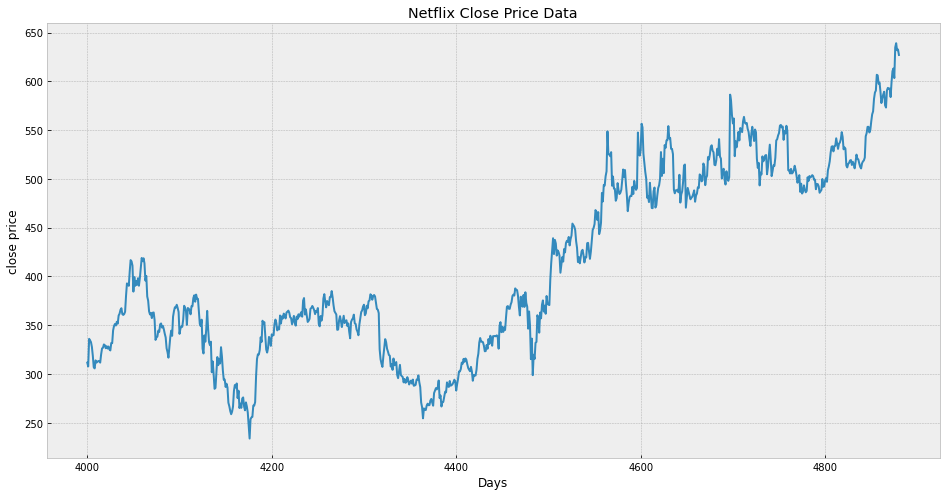

In [ ]:
#visualise the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix Close Price Data')
plt.xlabel('Days')
plt.ylabel('close price')
plt.plot(df['Close'][4000:])
plt.show()

In [ ]:
df = df.drop(['Date','Adj Close'],1)
random.shuffle(df)

KeyError: ignored

In [ ]:
X = df[['High','Low','Open','Volume']]
y = df['Close']

In [ ]:
y = np.array(y).reshape(-1,1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
y_train.mean()

0.1654812349580906

In [ ]:
y_test.mean()

0.1605061845743396

In [ ]:
#create the models and feed the training data
tree = DecisionTreeRegressor().fit(X_train,y_train)
lr = LinearRegression().fit(X_train,y_train)

In [ ]:
# show the model tree 
tree_prediction = tree.predict(X_test)
print('tree')
print(tree_prediction[-5:])
print('lr')
lr_prediction = lr.predict(X_test)

tree
[0.02220264 0.00566081 0.12903342 0.00194695 0.03973528]
lr


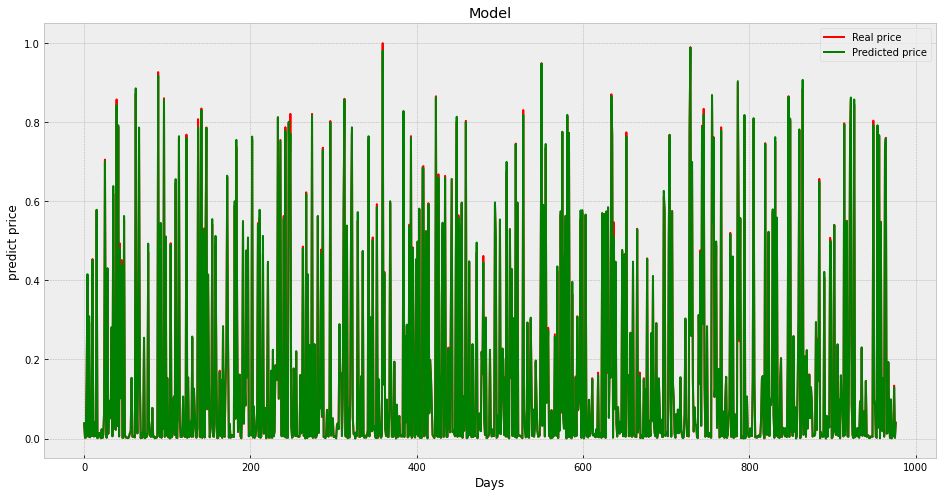

In [ ]:
#visualise the data
predictions = tree_prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('predict price')

plt.plot(y_test, color = 'red', label = 'Real price')
plt.plot(predictions, color = 'green', label = 'Predicted price')
plt.legend()
plt.show()

In [ ]:
#Compute the performance using MSE for tree regressor
print('MSE:')
print(mean_squared_error(y_test, predictions))

MSE:
2.2565734127079878e-05


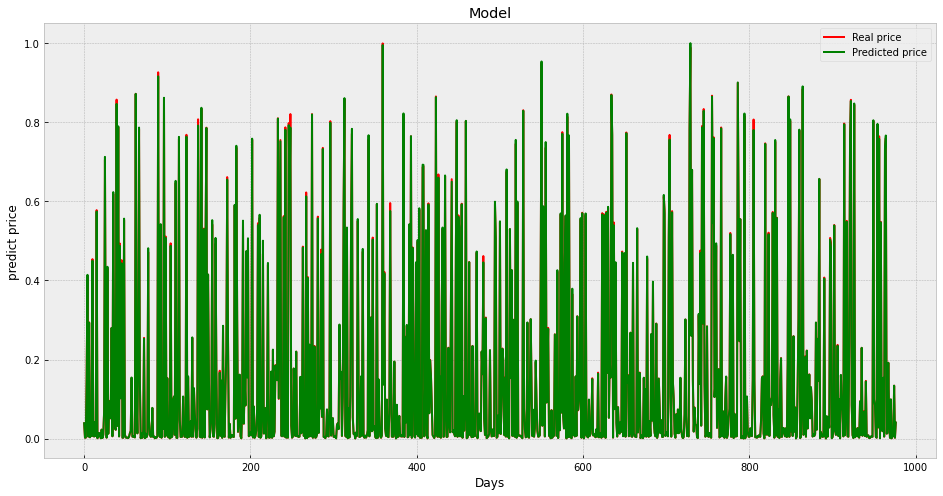

In [ ]:
#visualise the data
predictions = lr_prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('predict price')
plt.plot(y_test, color = 'red', label = 'Real price')
plt.plot(predictions, color = 'green', label = 'Predicted price')
plt.legend()
plt.show()

In [ ]:
#Compute the performance using MSE for linear regressor
print('MSE:')
print(mean_squared_error(y_test, predictions))

MSE:
9.085072316607191e-06
